In [22]:
import findspark

findspark.init()
print("done")

done


In [23]:
import pyspark
from pyspark.sql import SparkSession, SQLContext, Row

spark = SparkSession.builder.appName("kdd").getOrCreate()
sc = spark.sparkContext

In [24]:
!wget -O time_series_covid19_confirmed_global.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv  --no-check-certificate

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\Gow/etc/wgetrc
--2020-04-10 13:13:22--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv
Resolving data.humdata.org... 162.249.108.156
Connecting to data.humdata.org|162.249.108.156|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: `time_series_covid19_confirmed_global.csv'

     0K .......... .......... .......... .......... ..........  158K
    50K .......... ..                                          21,8M=0,3s

2020-04-10 13:13:23 (198 KB/s) - `time_series_covid19_confirmed_global.csv' saved [64483]



In [25]:
data_file = "time_series_covid19_confirmed_global.csv"

raw_rdd = sc.textFile(data_file)
raw_rdd.take(2)    

['Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20',
 ',Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484']

In [26]:
csv_rdd = raw_rdd.map(lambda row: row.split(","))
parsed_rdd = csv_rdd.map(lambda r: Row(
    Province=r[0],
    Country=r[1],
    Lat=r[2],
    Long=r[3],
    Covid_Date=r[4:]
    )
)

sqlContext = SQLContext(sc)
df = sqlContext.createDataFrame(parsed_rdd)

In [27]:
parsed_rdd.take(2)

[Row(Country='Country/Region', Covid_Date=['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20'], Lat='Lat', Long='Long', Province='Province/State'),
 Row(Country='Afghanistan', Covid_Date=['0', '0', '0', '0', '0

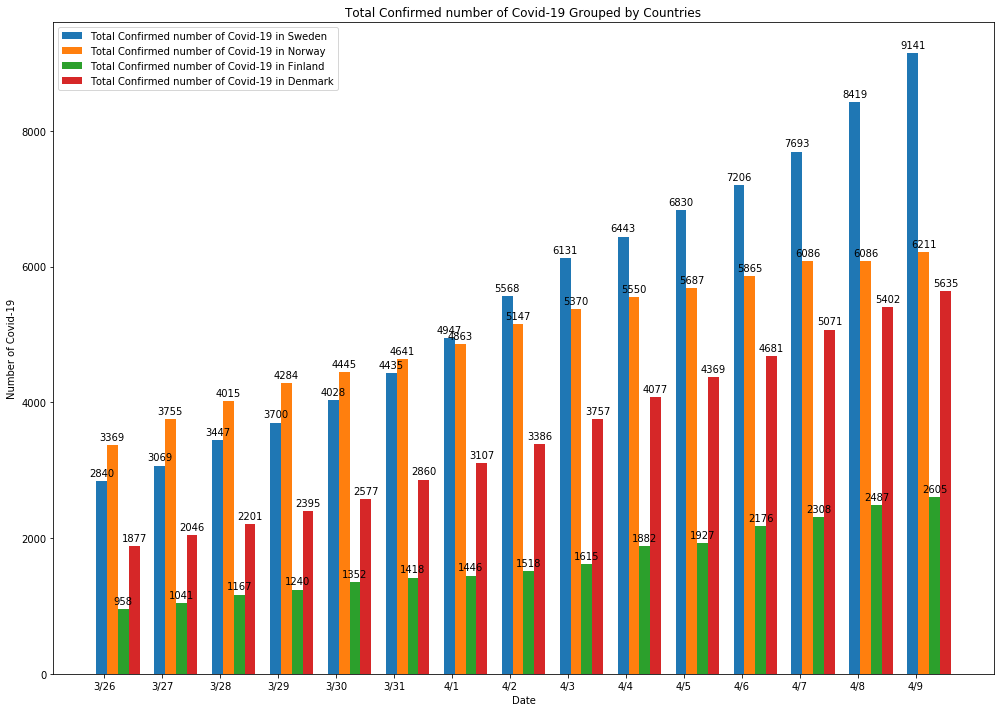

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

countries=["Sweden","Norway","Finland","Denmark"]
markers=["-ro","-bo","-go","-mo"]
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(14,10))
ax.set_title('Total Confirmed number of Covid-19 Grouped by Countries')
ax.set_ylabel('Number of Covid-19')
ax.set_xlabel('Date')

# autolable is Copied Code, not originally designed by Xingya
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for c in countries:
    i=countries.index(c)
    Covid=df.select("Covid_Date").where( (df.Country==c)  &  (df.Province =='') )
    acc_num_covid=np.array(Covid.toPandas().Covid_Date.array[0]).astype(np.integer)
    dates=np.array( df.select("Covid_Date").toPandas().Covid_Date.array[0])
    
    dates_of_covid=[]    
    for d in dates:
        dates_of_covid.append(d[0:-3])  
    dates_of_covid=np.array(dates_of_covid)    
  
    dates=dates_of_covid[-15:]
    x = np.arange(len(dates)) * 2.4
    y = acc_num_covid[-15:]
    rects = ax.bar(x + (i - 0.25)* width, y, width, label='Total Confirmed number of Covid-19 in ' + c)
    ax.set_xticks(x)
    ax.set_xticklabels(dates)
    autolabel(rects)
                       
plt.legend(loc="upper left")
fig.tight_layout()
plt.show()

C:\Users\xingy\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\xingy\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


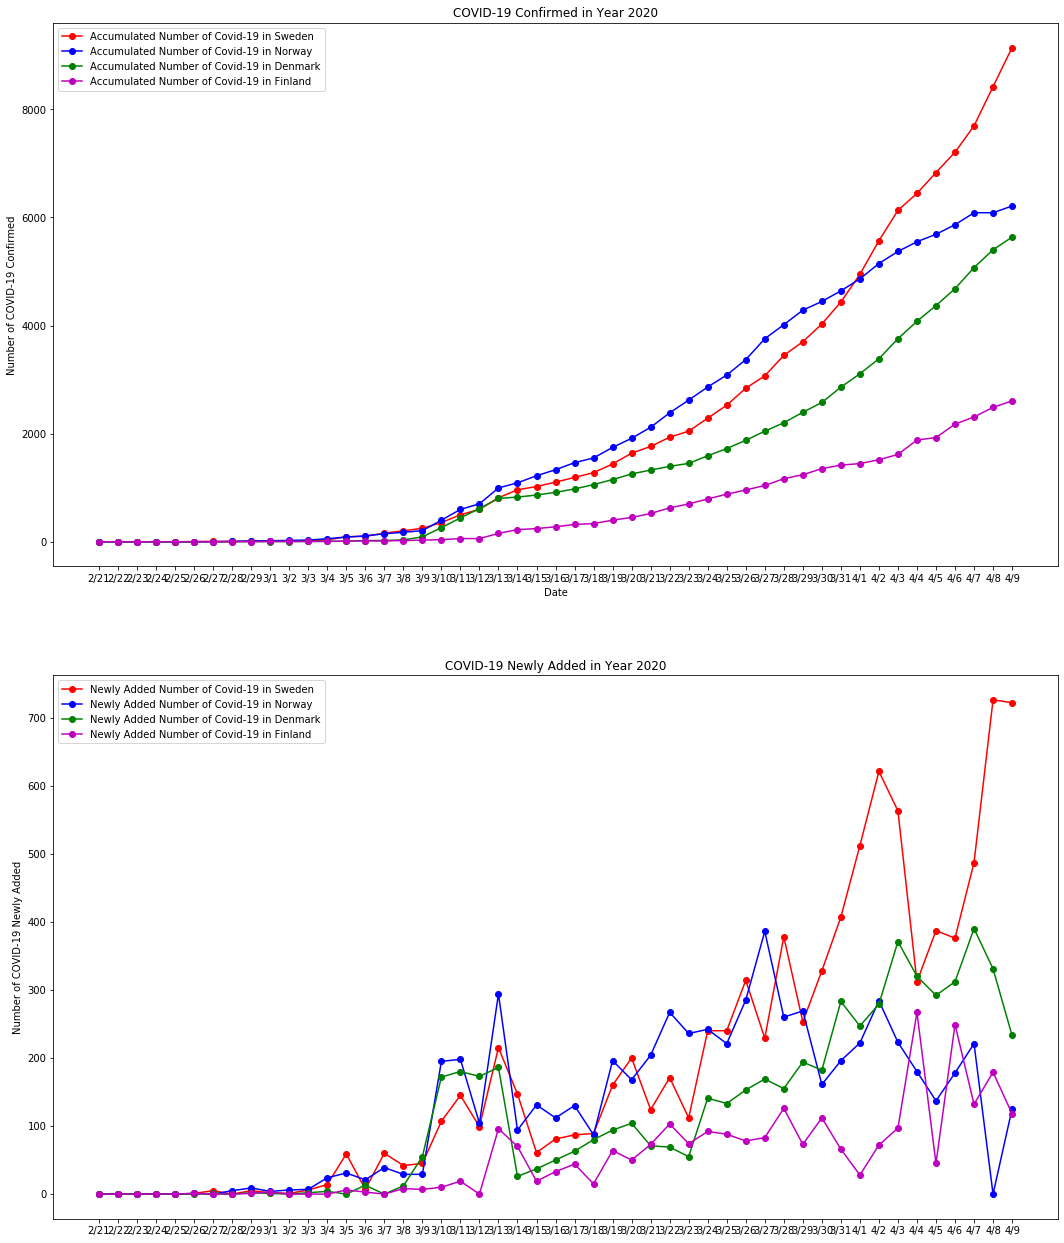

In [8]:
import numpy as np
import matplotlib.pyplot as plt

countries=["Sweden","Norway","Denmark","Finland"]
markers=["-ro","-bo","-go","-mo"]

plt.figure(figsize=(18,22))
plt.subplot(2, 1, 1)
plt.title("COVID-19 Confirmed in Year 2020") 
plt.xlabel("Date") 
plt.ylabel("Number of COVID-19 Confirmed") 
    
plt.subplot(2, 1, 2)
plt.title("COVID-19 Newly Added in Year 2020") 
plt.ylabel("Number of COVID-19 Newly Added") 

for c in countries:
    i=countries.index(c)
    Covid_Sweden=df.select("Covid_Date").where((df.Country==c)  &  (df.Province ==''))
    acc_num_covid=Covid_Sweden.toPandas().Covid_Date.array[0]
    acc_num_covid=np.array(acc_num_covid).astype(np.integer)
    dy=np.diff(acc_num_covid)

    Covid_date=df.select("Covid_Date")
    pandas_date_df = Covid_date.toPandas().Covid_Date.array[0]
    dates=np.array(pandas_date_df)
    dates_of_covid=[]
    for d in dates:
        dates_of_covid.append(d[0:-3])  
    dates_of_covid=np.array(dates_of_covid)    

    plt.subplot(2, 1, 1)    
    plt.plot(dates_of_covid[30:],acc_num_covid[30:], markers[i],label="Accumulated Number of Covid-19 in " + c) 
    plt.legend(loc="upper left")
    
    plt.subplot(2, 1, 2)
    plt.plot(dates_of_covid[30:],dy[29:],markers[i],label="Newly Added Number of Covid-19 in " + c) 
    plt.legend(loc="upper left")
    
plt.show()

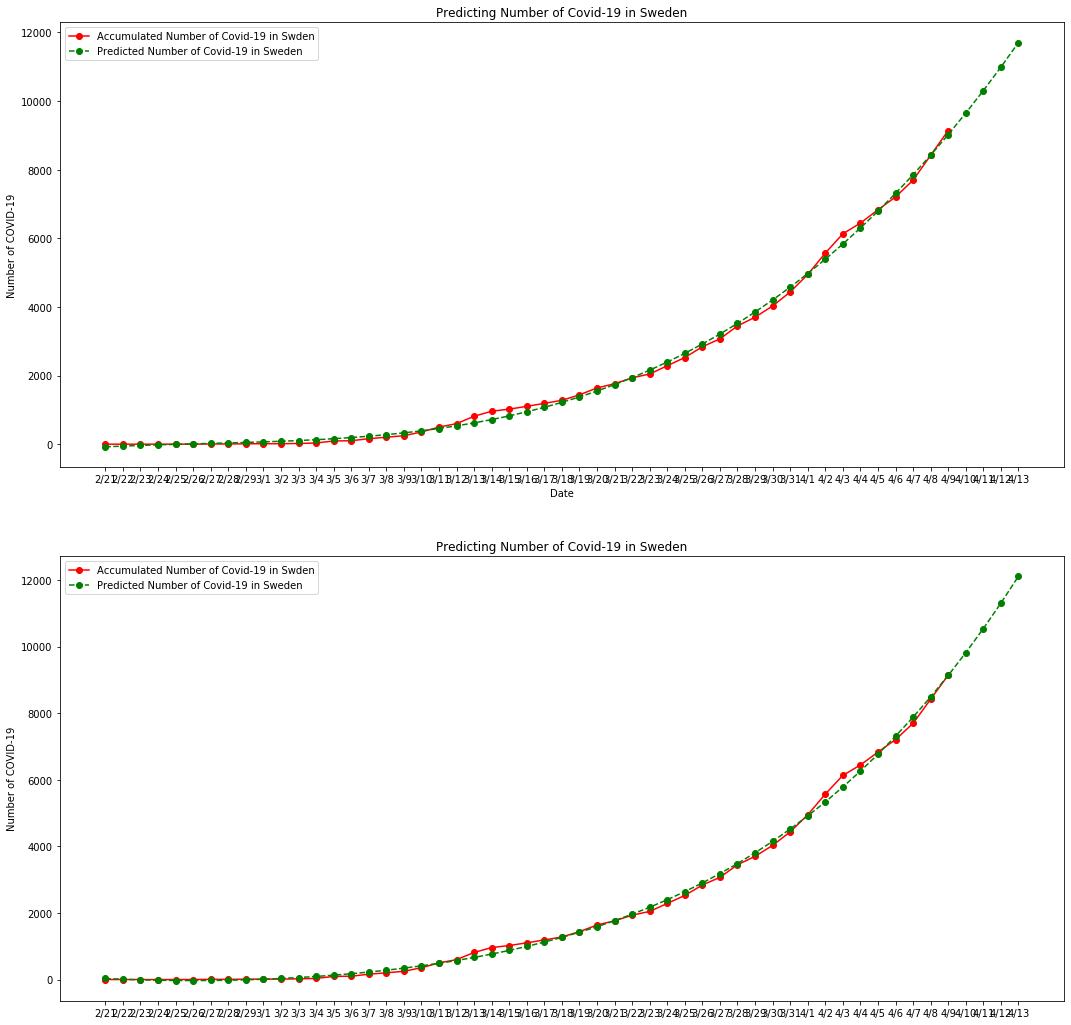

In [9]:
N=4
length=len(acc_num_covid[30:])
x = np.linspace(1, length,length)
x2 = np.linspace(1, length+N,length+N)

dates=['2/21', '2/22', '2/23', '2/24', '2/25', '2/26', '2/27', '2/28',
       '2/29', '3/1', '3/2', '3/3', '3/4', '3/5', '3/6', '3/7', '3/8',
       '3/9','3/10', '3/11', '3/12', '3/13','3/14','3/15', '3/16','3/17',
       '3/18', '3/19', '3/20','3/21','3/22', '3/23','3/24','3/25','3/26','3/27', '3/28','3/29','3/30', '3/31', 
       '4/1', '4/2','4/3', '4/4','4/5', '4/6','4/7','4/8','4/9','4/10','4/11',
      '4/12','4/13', '4/14','4/15','4/16','4/17','4/18','4/19']

Covid_Sweden=df.select("Covid_Date").where(df.Country=="Sweden")
acc_num_covid=Covid_Sweden.toPandas().Covid_Date.array[0]
acc_num_covid=np.array(acc_num_covid).astype(np.integer)
dy=np.diff(acc_num_covid)

z3 = np.polyfit(x,acc_num_covid[30:], 3)
p3 = np.poly1d(z3)

z4 = np.polyfit(x,acc_num_covid[30:], 4)
p4 = np.poly1d(z4)

plt.figure(figsize=(18,18))
plt.subplot(2, 1, 1)    
plt.title("Predicting Number of Covid-19 in Sweden") 
plt.xlabel("Date") 
plt.ylabel("Number of COVID-19") 
plt.plot(dates[0:length],acc_num_covid[30:],'-ro',label="Accumulated Number of Covid-19 in Swden") 
plt.plot(dates[:len(x2)],p3(x2),'--go',label="Predicted Number of Covid-19 in Sweden") 
plt.legend(loc="upper left")

plt.subplot(2, 1, 2)
plt.title("Predicting Number of Covid-19 in Sweden") 
plt.ylabel("Number of COVID-19") 
plt.plot(dates[0:length],acc_num_covid[30:],'-ro',label="Accumulated Number of Covid-19 in Swden") 
plt.plot(dates[0:len(x2)],p4(x2),'--go',label="Predicted Number of Covid-19 in Sweden") 
plt.legend(loc="upper left")

plt.show()

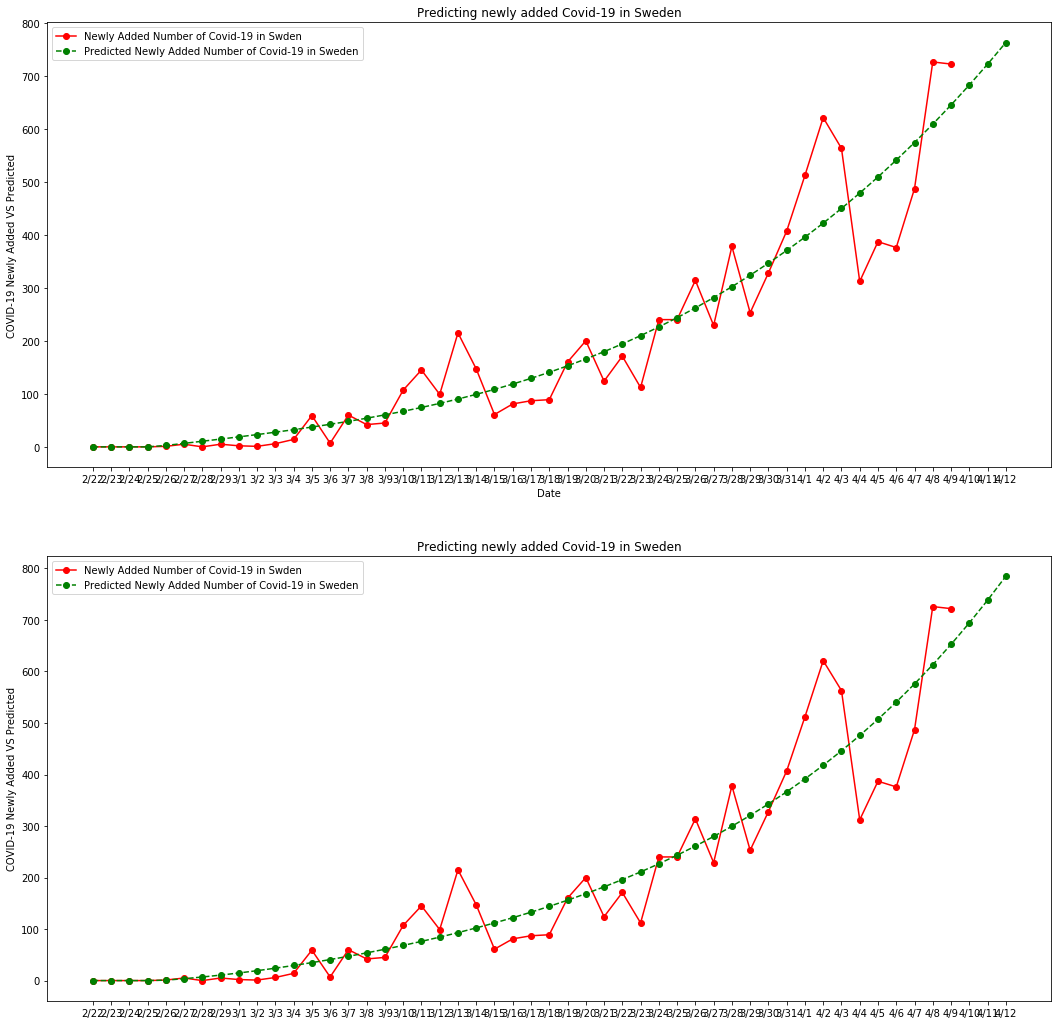

In [10]:
length=len(dy[30:])
x = np.linspace(1, length,length)
x2 = np.linspace(1, length+3,length+3)
dates=['2/21', '2/22', '2/23', '2/24', '2/25', '2/26', '2/27', '2/28',
       '2/29', '3/1', '3/2', '3/3', '3/4', '3/5', '3/6', '3/7', '3/8',
       '3/9','3/10', '3/11', '3/12', '3/13','3/14','3/15', '3/16','3/17',
       '3/18', '3/19', '3/20','3/21','3/22', '3/23','3/24','3/25','3/26','3/27', '3/28','3/29','3/30', '3/31', 
       '4/1', '4/2','4/3', '4/4','4/5', '4/6','4/7','4/8','4/9','4/10','4/11',
      '4/12','4/13', '4/14','4/15','4/16','4/17','4/18','4/19']

Covid_Sweden=df.select("Covid_Date").where(df.Country=="Sweden")
acc_num_covid=Covid_Sweden.toPandas().Covid_Date.array[0]
acc_num_covid=np.array(acc_num_covid).astype(np.integer)
dy=np.diff(acc_num_covid)

z3 = np.polyfit(x,dy[30:], 3)
p3 = np.poly1d(z3)
y3=p3(x2)
for i in range(len(y3)):
   if y3[i]<0:
    y3[i]=0

z4 = np.polyfit(x,dy[30:], 4)
p4 = np.poly1d(z4)
y4=p4(x2)
for i in range(len(y4)):
   if y4[i]<0:
    y4[i]=0

plt.figure(figsize=(18,18))
plt.subplot(2, 1, 1)    
plt.title("Predicting newly added Covid-19 in Sweden") 
plt.xlabel("Date") 
plt.ylabel("COVID-19 Newly Added VS Predicted") 
plt.plot(dates[1:len(dy[30:])+1],dy[30:],'-ro',label="Newly Added Number of Covid-19 in Swden") 
plt.plot(dates[1:len(x2)+1],y3,'--go',label="Predicted Newly Added Number of Covid-19 in Sweden") 
plt.legend(loc="upper left")

plt.subplot(2, 1, 2)
plt.title("Predicting newly added Covid-19 in Sweden") 
plt.ylabel("COVID-19 Newly Added VS Predicted") 
plt.plot(dates[1:len(dy[30:])+1],dy[30:],'-ro',label="Newly Added Number of Covid-19 in Swden") 
plt.plot(dates[1:len(x2)+1],y4,'--go',label="Predicted Newly Added Number of Covid-19 in Sweden") 
plt.legend(loc="upper left")

plt.show()

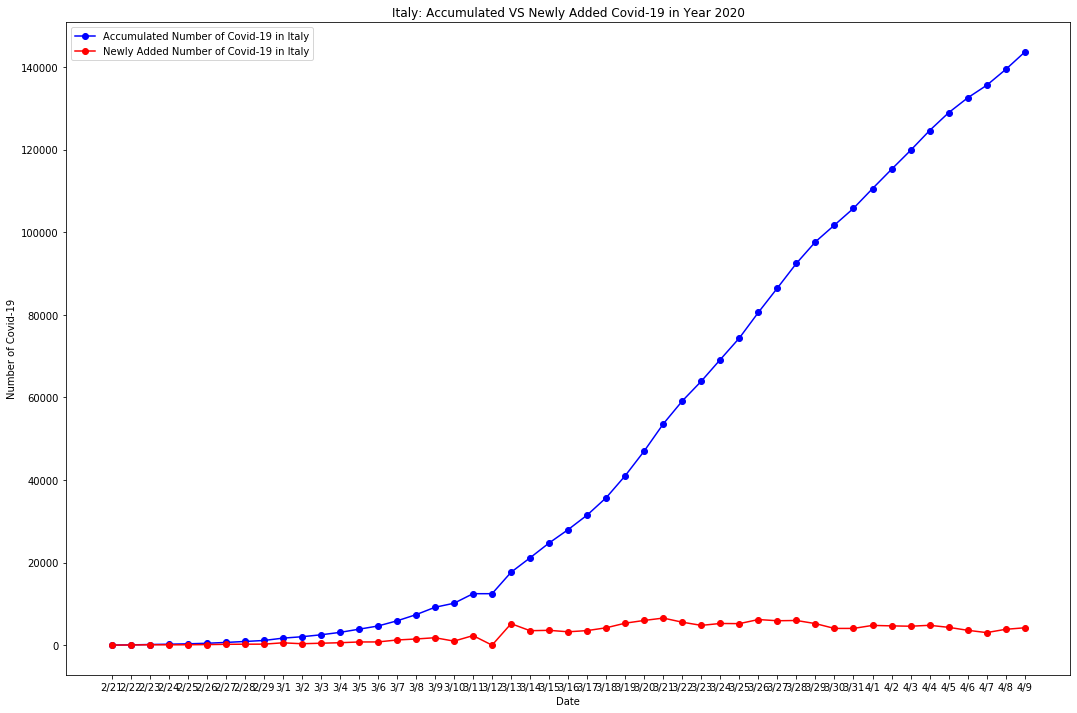

In [11]:
c="Italy"
Covid_Sweden=df.select("Covid_Date").where(df.Country==c)

import numpy as np
acc_num_covid=Covid_Sweden.toPandas().Covid_Date.array[0]
acc_num_covid=np.array(acc_num_covid).astype(np.integer)
dy=np.diff(acc_num_covid)

Covid_date=df.select("Covid_Date")
pandas_date_df = Covid_date.toPandas().Covid_Date.array[0]
dates=np.array(pandas_date_df)
dates_of_covid=[]
for d in dates:
    dates_of_covid.append(d[0:-3])
    
dates_of_covid=np.array(dates_of_covid)    

plt.figure(figsize=(18,12))
plt.title(c+": Accumulated VS Newly Added Covid-19 in Year 2020") 
plt.xlabel("Date") 
plt.ylabel("Number of Covid-19") 


plt.plot(dates_of_covid[30:],acc_num_covid[30:],'-bo', label="Accumulated Number of Covid-19 in " + c) 
plt.plot(dates_of_covid[30:],dy[29:],'-ro',label="Newly Added Number of Covid-19 in " + c) 
plt.legend(loc="upper left")
plt.show()

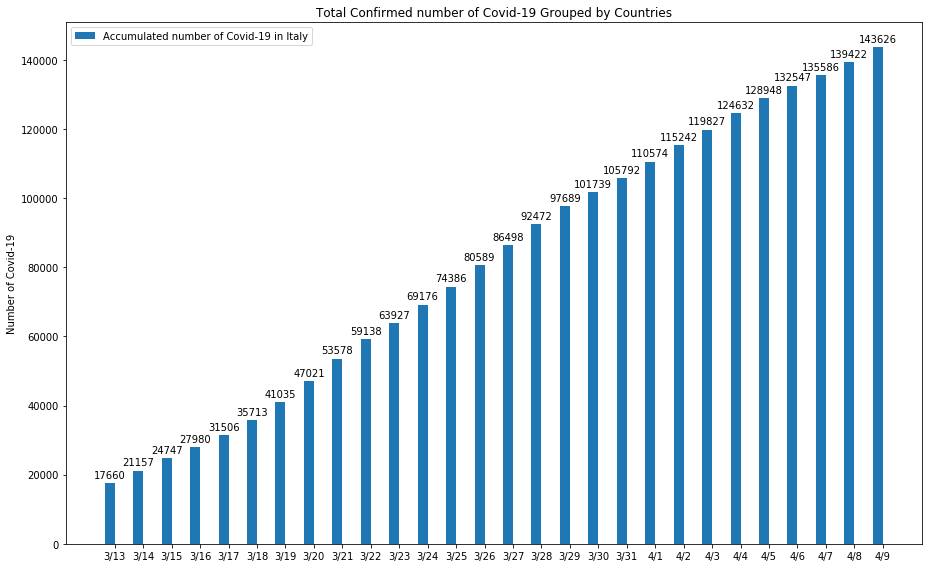

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

dates = dates_of_covid[-28:]
y = acc_num_covid[-28:]
x = np.arange(len(dates))  

width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(13,8))
rect1 = ax.bar(x - width/2, y, width, label='Accumulated number of Covid-19 in Italy')

ax.set_ylabel('Number of Covid-19')
ax.set_title('Total Confirmed number of Covid-19 Grouped by Countries')
ax.set_xticks(x)
ax.set_xticklabels(dates)

# Copied Code, not originally designed by Xingya
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="upper left")
autolabel(rect1)
fig.tight_layout()
plt.show()

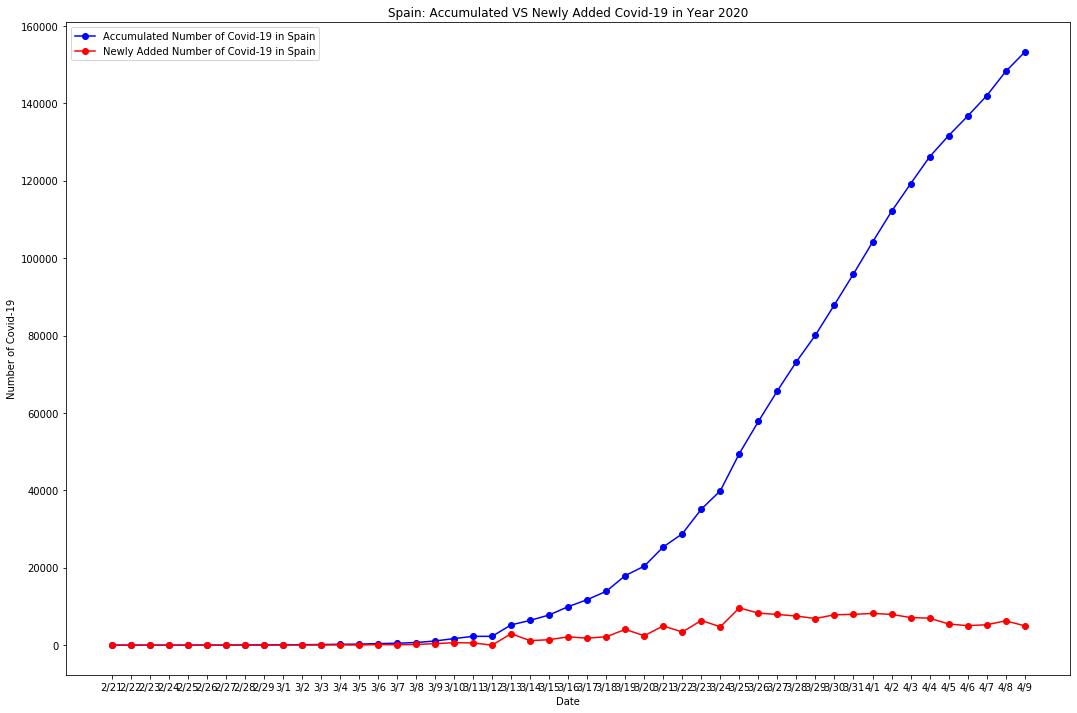

In [13]:
c="Spain"
Covid_Sweden=df.select("Covid_Date").where(df.Country==c)

import numpy as np
acc_num_covid=Covid_Sweden.toPandas().Covid_Date.array[0]
acc_num_covid=np.array(acc_num_covid).astype(np.integer)
dy=np.diff(acc_num_covid)

Covid_date=df.select("Covid_Date")
pandas_date_df = Covid_date.toPandas().Covid_Date.array[0]
dates=np.array(pandas_date_df)
dates_of_covid=[]
for d in dates:
    dates_of_covid.append(d[0:-3])
    
dates_of_covid=np.array(dates_of_covid)    

plt.figure(figsize=(18,12))
plt.title(c+": Accumulated VS Newly Added Covid-19 in Year 2020") 
plt.xlabel("Date") 
plt.ylabel("Number of Covid-19") 


plt.plot(dates_of_covid[30:],acc_num_covid[30:],'-bo', label="Accumulated Number of Covid-19 in " + c) 
plt.plot(dates_of_covid[30:],dy[29:],'-ro',label="Newly Added Number of Covid-19 in " + c) 
plt.legend(loc="upper left")
plt.show()

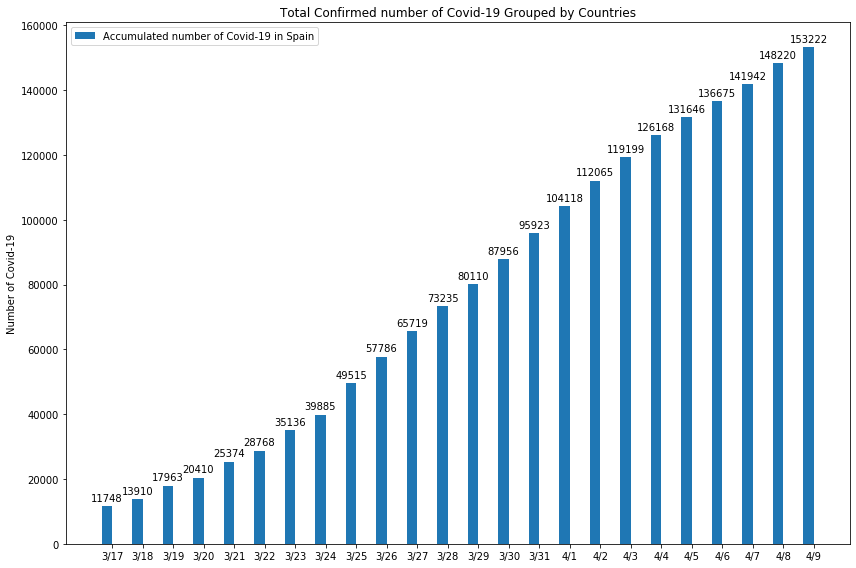

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

dates = dates_of_covid[-24:]
y = acc_num_covid[-24:]
x = np.arange(len(dates))  

width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rect1 = ax.bar(x - width/2, y, width, label='Accumulated number of Covid-19 in Spain')

ax.set_ylabel('Number of Covid-19')
ax.set_title('Total Confirmed number of Covid-19 Grouped by Countries')
ax.set_xticks(x)
ax.set_xticklabels(dates)

# Copied Code, not originally designed by Xingya
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="upper left")
autolabel(rect1)
fig.tight_layout()
plt.show()

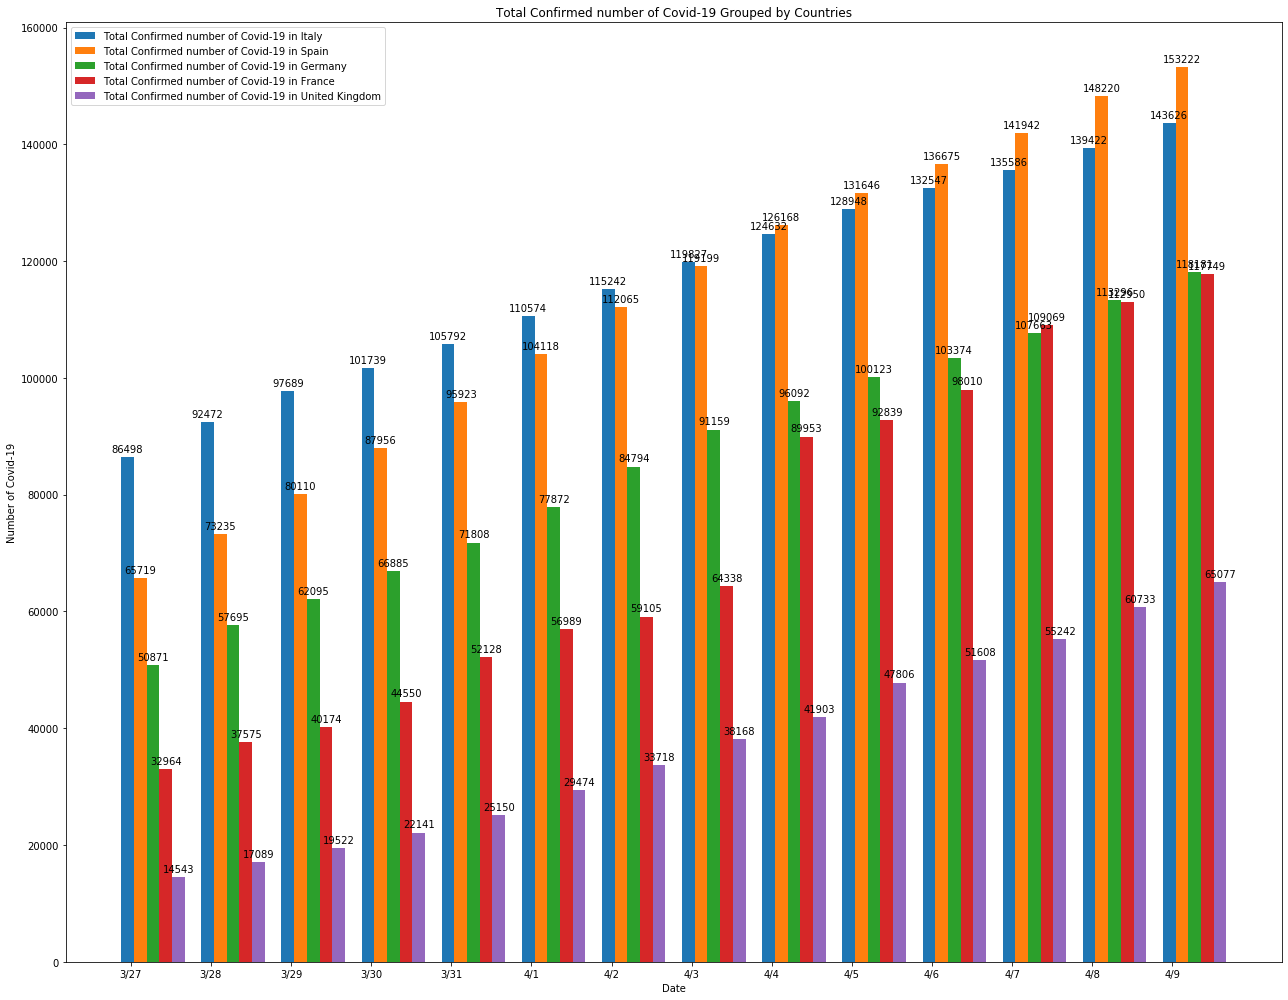

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

countries=["Italy","Spain","Germany","France","United Kingdom"]
markers=["-ro","-bo","-go","-mo"]
width = 0.38  # the width of the bars

fig, ax = plt.subplots(figsize=(18,14))
ax.set_title('Total Confirmed number of Covid-19 Grouped by Countries')
ax.set_ylabel('Number of Covid-19')
ax.set_xlabel('Date')

# autolable is Copied Code, not originally designed by Xingya
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for c in countries:
    i=countries.index(c)
    Covid=df.select("Covid_Date").where( (df.Country==c)  &  (df.Province =='') )
    acc_num_covid=np.array(Covid.toPandas().Covid_Date.array[0]).astype(np.integer)
    dates=np.array( df.select("Covid_Date").toPandas().Covid_Date.array[0])
    
    dates_of_covid=[]    
    for d in dates:
        dates_of_covid.append(d[0:-3])  
    dates_of_covid=np.array(dates_of_covid)    
  
    dates=dates_of_covid[-14:]
    x = np.arange(len(dates)) * 2.4
    y = acc_num_covid[-14:]
    rects = ax.bar(x + (i - 0.25)* width, y, width, label='Total Confirmed number of Covid-19 in ' + c)
    ax.set_xticks(x)
    ax.set_xticklabels(dates)
    autolabel(rects)
                       
plt.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [16]:
!wget -O time_series_covid19_deaths_global.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv --no-check-certificate


SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\Gow/etc/wgetrc
--2020-04-10 13:09:37--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv
Resolving data.humdata.org... 162.249.108.156
Connecting to data.humdata.org|162.249.108.156|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: `time_series_covid19_deaths_global.csv'

     0K .......... .......... .......... .......... ..........  160K
    50K .                                                      24,1G=0,3s

2020-04-10 13:09:38 (164 KB/s) - `time_series_covid19_deaths_global.csv' saved [52493]



In [17]:
data_file_deaths = "time_series_covid19_deaths_global.csv"

raw_rdd = sc.textFile(data_file_deaths)
raw_rdd.take(2)  

['Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20',
 ',Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15']

In [18]:
csv_rdd = raw_rdd.map(lambda row: row.split(","))
parsed_rdd = csv_rdd.map(lambda r: Row(
    Province=r[0],
    Country=r[1],
    Lat=r[2],
    Long=r[3],
    Covid_Date=r[4:]
    )
)

sqlContext = SQLContext(sc)
df = sqlContext.createDataFrame(parsed_rdd)

In [19]:
parsed_rdd.take(2)

[Row(Country='Country/Region', Covid_Date=['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20'], Lat='Lat', Long='Long', Province='Province/State'),
 Row(Country='Afghanistan', Covid_Date=['0', '0', '0', '0', '0

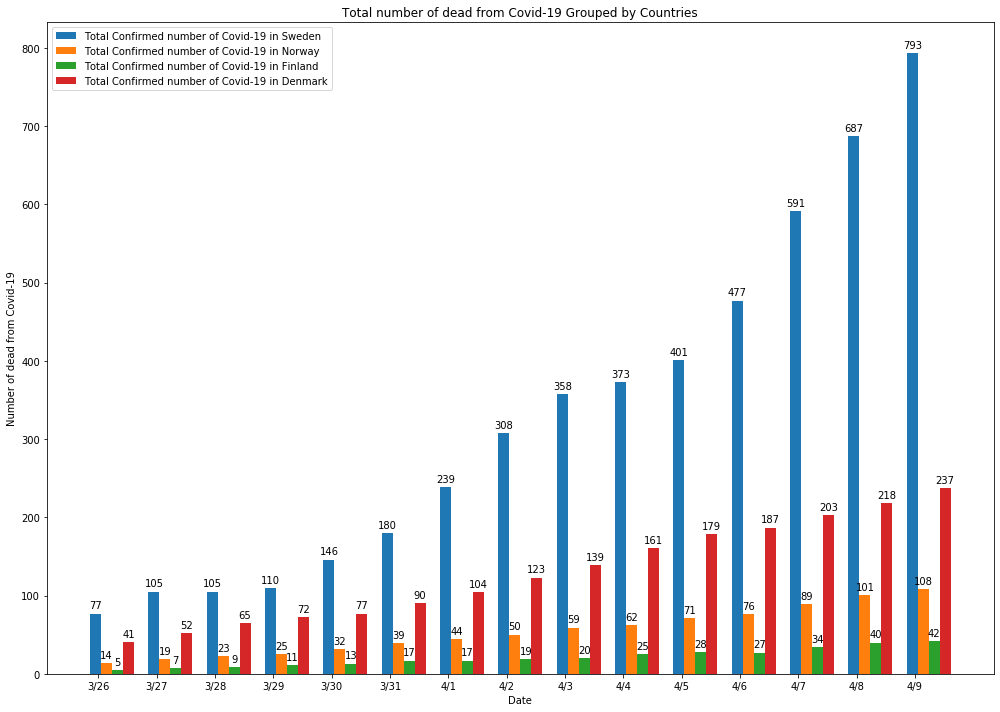

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

countries=["Sweden","Norway","Finland","Denmark"]
markers=["-ro","-bo","-go","-mo"]
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(14,10))
ax.set_title('Total number of dead from Covid-19 Grouped by Countries')
ax.set_ylabel('Number of dead from Covid-19')
ax.set_xlabel('Date')

# autolable is Copied Code, not originally designed by Xingya
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for c in countries:
    i=countries.index(c)
    Covid=df.select("Covid_Date").where( (df.Country==c)  &  (df.Province =='') )
    acc_num_covid=np.array(Covid.toPandas().Covid_Date.array[0]).astype(np.integer)
    dates=np.array( df.select("Covid_Date").toPandas().Covid_Date.array[0])
    
    dates_of_covid=[]    
    for d in dates:
        dates_of_covid.append(d[0:-3])  
    dates_of_covid=np.array(dates_of_covid)    
  
    dates=dates_of_covid[-15:]
    x = np.arange(len(dates)) * 2.4
    y = acc_num_covid[-15:]
    rects = ax.bar(x + (i - 0.25)* width, y, width, label='Total Confirmed number of Covid-19 in ' + c)
    ax.set_xticks(x)
    ax.set_xticklabels(dates)
    autolabel(rects)
                       
plt.legend(loc="upper left")
fig.tight_layout()
plt.show()

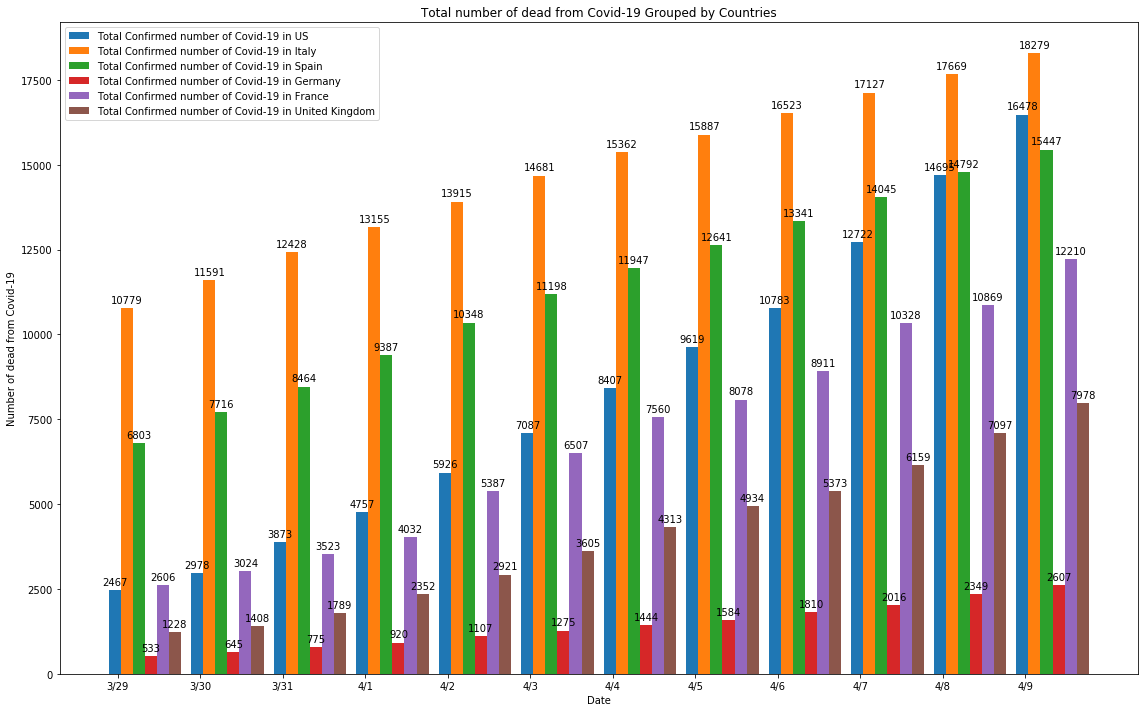

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

countries=["US","Italy","Spain","Germany","France","United Kingdom"]
markers=["-ro","-bo","-go","-mo"]
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Total number of dead from Covid-19 Grouped by Countries')
ax.set_ylabel('Number of dead from Covid-19')
ax.set_xlabel('Date')

# autolable is Copied Code, not originally designed by Xingya
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for c in countries:
    i=countries.index(c)
    Covid=df.select("Covid_Date").where( (df.Country==c)  &  (df.Province =='') )
    acc_num_covid=np.array(Covid.toPandas().Covid_Date.array[0]).astype(np.integer)
    dates=np.array( df.select("Covid_Date").toPandas().Covid_Date.array[0])
    
    dates_of_covid=[]    
    for d in dates:
        dates_of_covid.append(d[0:-3])  
    dates_of_covid=np.array(dates_of_covid)    
  
    dates=dates_of_covid[-12:]
    x = np.arange(len(dates)) * 2.4
    y = acc_num_covid[-12:]
    rects = ax.bar(x + (i - 0.25)* width, y, width, label='Total Confirmed number of Covid-19 in ' + c)
    ax.set_xticks(x)
    ax.set_xticklabels(dates)
    autolabel(rects)
                       
plt.legend(loc="upper left")
fig.tight_layout()
plt.show()